In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/brennancurrie/Desktop/My_Code/Class_Materials/Challenges/Module_5_Challenge/pymaceuticals/data/mouse_metadata.csv"
study_results_path = "/Users/brennancurrie/Desktop/My_Code/Class_Materials/Challenges/Module_5_Challenge/pymaceuticals/data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
datacombined = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
datacombined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
micecount = len(datacombined['Mouse ID'].unique())
micecount

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grp = datacombined.loc[datacombined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
duplicate_mouse_ids = grp.unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupegrp = datacombined.loc[(datacombined["Mouse ID"] == "g989")]

dupegrp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandataframe = datacombined.loc[(datacombined["Mouse ID"] != "g989")]
cleandataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
micecountclean = len(cleandataframe['Mouse ID'].unique())
micecountclean


248

In [9]:
#SUMMARY STATISTICS
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tvmean = cleandataframe.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tvmedian = cleandataframe.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tvvariance = cleandataframe.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tvsd = cleandataframe.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tvsem = cleandataframe.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

sumstatdf = pd.DataFrame({"Mean Tumor Volume":tvmean,
                          "Median Tumor Volume": tvmedian,
                          "Tumor Volume Variance": tvvariance,
                          "Tumor Volume Std. Dev.": tvsd,
                          "Tumor Volume Std. Error": tvsem
                         })
sumstatdf

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#BONUS/OPTIONAL
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

druggrp = cleandataframe.groupby('Drug Regimen')['Tumor Volume (mm3)']
druggrp.agg(['mean','median', 'var','std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number Of Mice Tested')

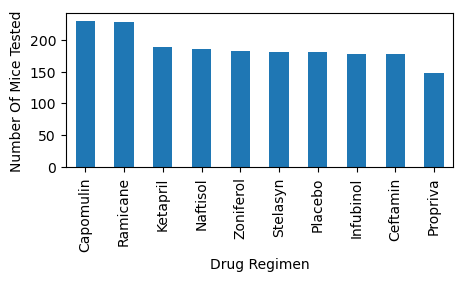

In [15]:
# BAR & PIE CHARTS
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

miceperdrug = cleandataframe['Drug Regimen'].value_counts()

miceperdrug.plot(kind="bar",figsize=(5,2))

plt.xlabel('Drug Regimen')
plt.ylabel('Number Of Mice Tested')


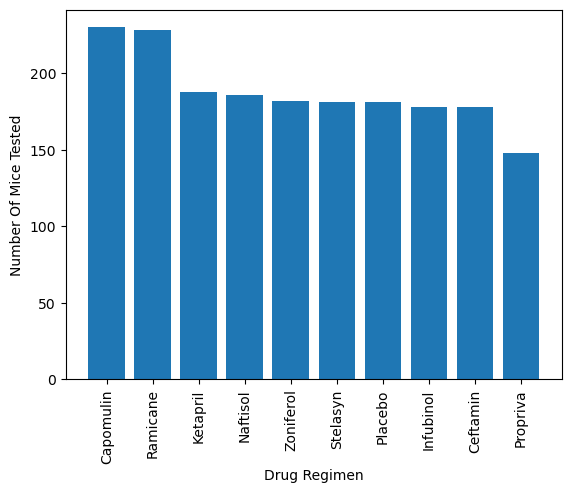

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

xvalues = miceperdrug.index.values
yvalues = miceperdrug.values

plt.bar(xvalues, yvalues)
plt.xlabel('Drug Regimen')
plt.ylabel('Number Of Mice Tested')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Sex'>

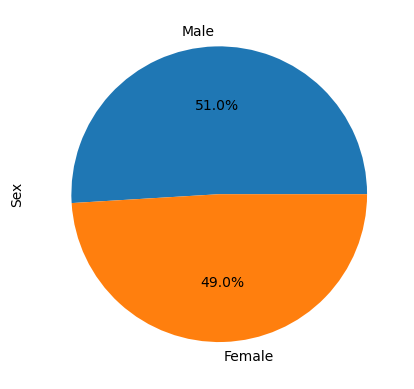

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gendercounts.plot(kind = 'pie', autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

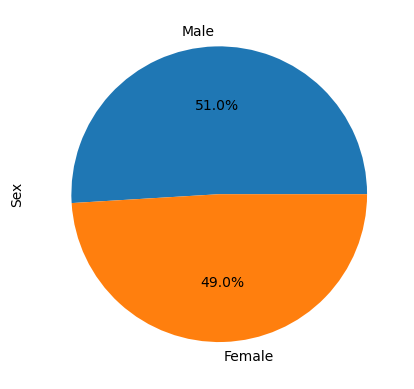

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gendercounts = cleandataframe['Sex'].value_counts()
labels = ['Male', 'Female']
explode = (0,0)
plt.pie(gendercounts,explode=explode,labels=labels,autopct='%1.1f%%')
plt.ylabel('Sex')

In [20]:
#QUARTILES, OUTLIERS, AND BOXPLOTS

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Start by getting the last (greatest) timepoint for each mouse

lasttime = cleandataframe.groupby('Mouse ID').max()['Timepoint']
lasttimedf = pd.DataFrame(lasttime)
lastdf = lasttimedf.reset_index()                     
lastdf

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


###### Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

newdf = pd.merge(cleandataframe, lastdf, how="right", on=["Mouse ID", 'Timepoint'])
newdf

In [33]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
emptylist = []


In [34]:
#Locate the rows which contain mice on each drug and get the tumor volumes 
#looping through your "druglist" varaible, selecting the drug regimen and its corresponding volume from "newdf"
#using iloc, and appending it to the empty list. 

for drug in druglist:
    final_tumor_vol = newdf.loc[newdf["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    emptylist.append(final_tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    tumorvols = newdf['Tumor Volume (mm3)']
    tumorvolsqt = tumorvols.quantile([.25, .5, .75])

    upperq = tumorvolsqt[0.75] 
    lowerq = tumorvolsqt[0.25]
    innerqr = upperq-lowerq 

    outerbounds = upperq + (1.5 * innerqr)
    innerbounds = lowerq - (1.5 * innerqr)

    # Determine outliers using upper and lower bounds

    outliers = final_tumor_vol.loc[(final_tumor_vol < innerbounds) | (final_tumor_vol > outerbounds)]
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


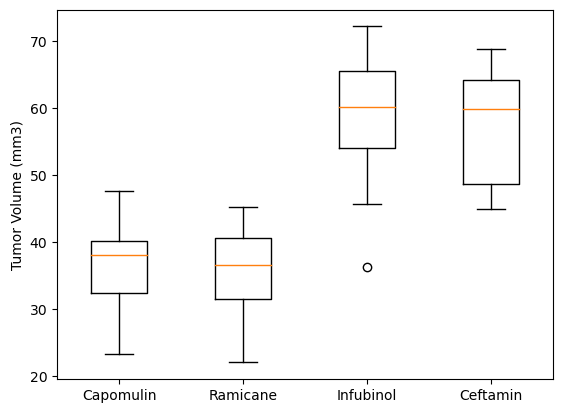

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.boxplot(emptylist)
ax1.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], druglist)
plt.show()


Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

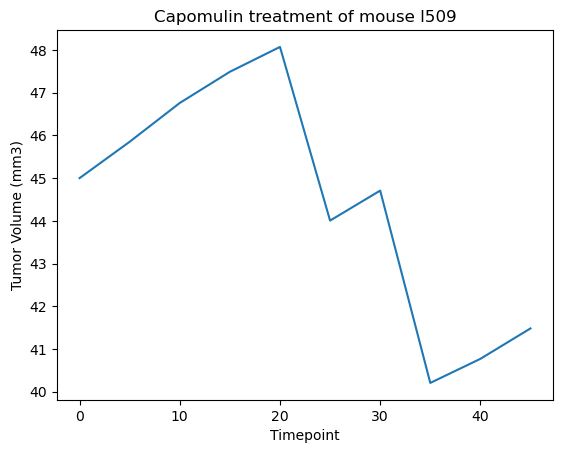

In [40]:
#LINE AND SCATTER PLOTS
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin l509

mouseid = capomulin.loc[(capomulin["Mouse ID"] == "l509")]

liney = mouseid['Tumor Volume (mm3)']
linex = mouseid['Timepoint']

plt.plot(linex,liney)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

Text(0.5, 0, 'Weight (g)')

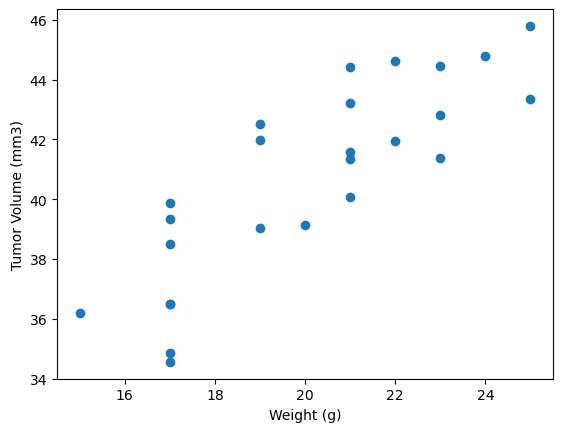

In [30]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = cleandataframe.loc[(cleandataframe["Drug Regimen"] == "Capomulin")]

#HINT
#use the capomulin dataframe and use group by and mean()to calculate the averages, you will group by mouse id.
#store this in a new dataframe and name is accordingly and then you can use the .scatter function 
#to plot the weight against the tumor volume

scaty = capomulin.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
scatx = capomulin.groupby('Mouse ID').mean()['Weight (g)']

plt.scatter(x=scatx, y=scaty)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

The correlation between mouse weight and the average tumor volume is 0.84


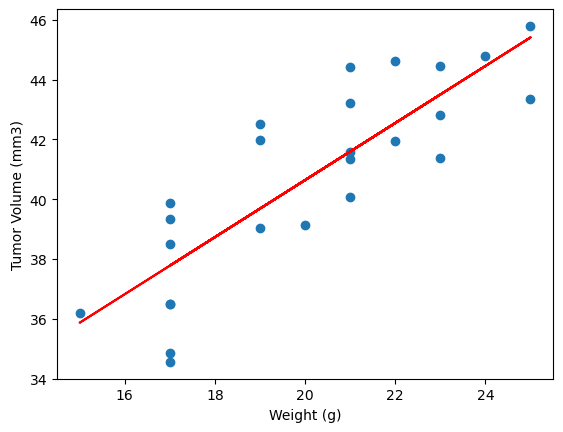

In [31]:
#CORRELATION & REGRESSION
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(scatx,scaty)



(slope, intercept, rvalue, pvalue, stderr) = linregress(scatx,scaty)
regressvalues = scatx * slope + intercept 

print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

#plot scatter
plt.scatter(x=scatx, y=scaty)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')


#plot corr/reg line
plt.plot(scatx,regressvalues,'r-')

plt.show()